# Goal: resample XYZ signals to 10 Hz sampling rate

#### Experiment: I drove my car from home to Censio and back.  My phone rested on my seat facing forwards for the trip to Censio.  Nick was in the passenger seat with his phone in his pocket.  For the return trip, we swapped phones.  The total time for the trip was about 15 minutes.

In [33]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [34]:
# load the raw data
df = pd.read_csv('../Data/shaneiphone_exp2.csv')

#### For SensorLog data, sampling rate can be obtained directly from 'motionTimestamp_sinceReboot'

In [35]:
sampling_rate = 1 / np.diff(df['motionTimestamp_sinceReboot'])

(array([  1.40000000e+02,   2.00000000e+00,   1.45680000e+04,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          3.19800000e+03]),
 array([  9.92073334,  12.08201557,  14.2432978 ,  16.40458003,
         18.56586226,  20.72714449,  22.88842673,  25.04970896,
         27.21099119,  29.37227342,  31.53355565]),
 <a list of 10 Patch objects>)

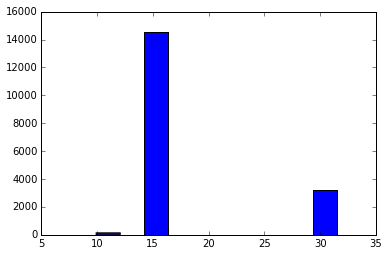

In [36]:
plt.hist(sampling_rate)

#### The sampling rate was 15 Hz most of the time.  Sometimes it was 30 Hz.  Very occasionally it was close to 10 Hz.  This is somewhat annoying, so let's resample to 10 Hz.

#### First, we have to make a DateTime column from the loggingTime columns and set it as the index

In [37]:
df['DateTime'] = pd.DatetimeIndex(df['loggingTime'])
df = df.set_index('DateTime')

#### Then we just use pandas built-in resampling function

In [38]:
# 100L corresponds to 100 milliseconds
rdf = df.resample('100L')

In [45]:
# check for nans
rdf.isnull().sum()

loggingSample                             3
locationTimestamp_since1970               3
locationLatitude                          3
locationLongitude                         3
locationAltitude                          3
locationSpeed                             3
locationCourse                            3
locationVerticalAccuracy                  3
locationHorizontalAccuracy                3
locationFloor                             3
locationHeadingTimestamp_since1970        3
locationHeadingX                          3
locationHeadingY                          3
locationHeadingZ                          3
locationTrueHeading                       3
locationMagneticHeading                   3
locationHeadingAccuracy                   3
accelerometerTimestamp_sinceReboot        3
accelerometerAccelerationX                3
accelerometerAccelerationY                3
accelerometerAccelerationZ                3
gyroTimestamp_sinceReboot                 3
gyroRotationX                   

#### 3 rows in the resampled database are nan's.  Just drop them.

In [47]:
rdf = rdf.dropna()

In [48]:
resampled_rate = 1 / np.diff(rdf['motionTimestamp_sinceReboot'])

(array([  2.40000000e+01,   2.15500000e+03,   1.64000000e+03,
          4.53600000e+03,   1.00000000e+00,   1.00200000e+03,
          1.00000000e+00,   1.04100000e+03,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.80000000e+01]),
 array([  5.46289872,   6.76143832,   8.05997791,   9.35851751,
         10.6570571 ,  11.9555967 ,  13.25413629,  14.55267589,
         15.85121548,  17.14975508,  18.44829467,  19.74683427,
         21.04537386,  22.34391346,  23.64245305,  24.94099265,
         26.23953224,  27.53807184,  28.83661143,  30.13515103,  31.43369062]),
 <a list of 20 Patch objects>)

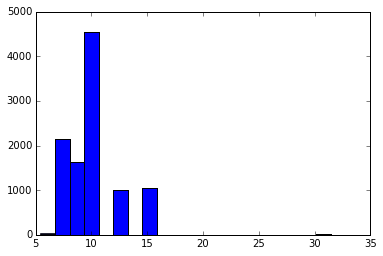

In [51]:
plt.hist(resampled_rate, bins=20)

#### This seems like pretty lousy performance, but the DateTime indices themselves increment by 0.1 second with each row.  We'll proceed for now, but keep this in mind later if there are problems further down the road.